# Relative Strength Index Jupyter Notebook for Data Visualization

<br />
A visualization of RSI compared to the stock prices using 1 month of stock data and 5 minute candles from Amazon, Apple, and Google.

<br /><br/>
Below you will find the Python script and data visualizations:
<br /><br/>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


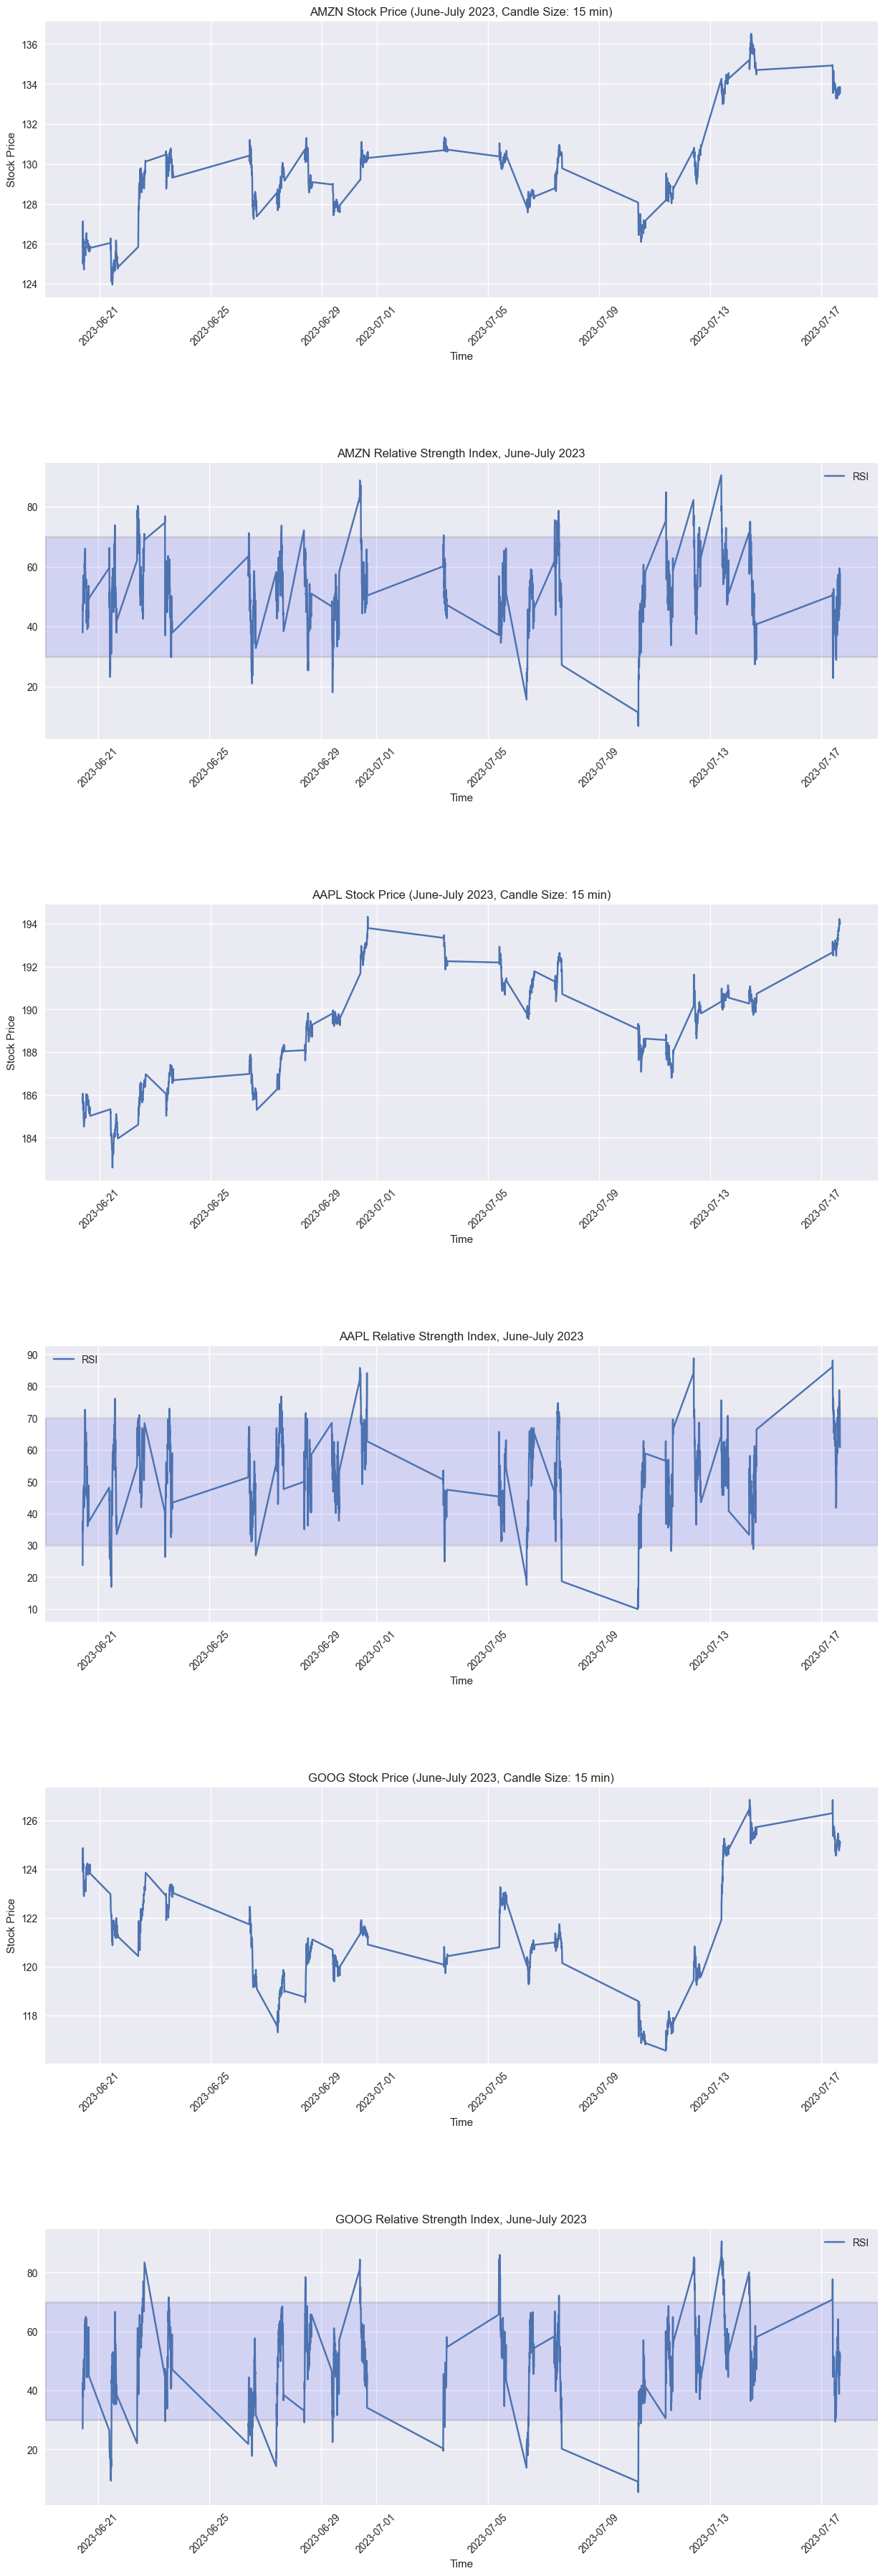

In [9]:
# --------------------------------------------------------
# Author: Daniel Xu
# Date: 07/17/2023
# Description: A program that computes Relative Strength Index technical indicator
#   for various stocks
# RSI Algorithm:
#   change = Sum(Previous Close - Current Close)
#   gain = change >= 0 ? change : 0
#   loss = change < 0 ? change * -1 : 0
#   avgGain = rma(gain, 14)
#   avgLoss = rma(loss, 14)
#       rma is an exponential moving average with alpha = 1/length
#   rs = avgGain / avgLoss
#   rsi = 100 - (100 / (1 + rs))
# --------------------------------------------------------

# Import libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

def relative_strength_index(df, length):
    temp = df.copy()
    temp['Change'] = temp['Adj Close'] - temp['Adj Close'].shift(1)
    temp['Gain'] = np.where(temp['Change'] >= 0, temp['Change'], 0)
    temp['Loss'] = np.where(temp['Change'] < 0, -1 * temp['Change'], 0)
    temp['Average Gain'] = temp['Gain'].ewm(alpha=1/length, min_periods=length).mean()
    temp['Average Loss'] = temp['Loss'].ewm(alpha=1/length, min_periods=length).mean()
    temp['Relative Strength'] = temp['Average Gain'] / temp['Average Loss']
    temp['RSI'] = 100 - 100/(1 + temp['Relative Strength'])
    
    return temp['RSI']
    

# Download historical data for various stocks
tickers = ['AMZN', 'AAPL', 'GOOG']
stock_data = {}

for t in tickers:
    data = yf.download(t, period='1mo', interval='5m') # 5 minute candles
    data.dropna(how='any', inplace=True)
    stock_data[t] = data

for s in stock_data:
    stock_data[s]['RSI'] = relative_strength_index(stock_data[s], 14)

%matplotlib inline

# Initialize the Matplotlib plot
fig = plt.figure(figsize=(15, 45))
gs = gridspec.GridSpec(6, 1, figure=fig)
style.use('seaborn-v0_8')

width = 0.4
width2 = 0.05
colour = 'blue'
colour2 = 'red'

# Add subplots for all graphs, using gridspec to properly set spacing
ax1 = fig.add_subplot(gs[0:1])
ax1a = fig.add_subplot(gs[1:2])
ax2 = fig.add_subplot(gs[2:3])
ax2a = fig.add_subplot(gs[3:4])
ax3 = fig.add_subplot(gs[4:5])
ax3a = fig.add_subplot(gs[5:6])

# AMZN Generic Stock Price
ax1.set(title="AMZN Stock Price (June-July 2023, Candle Size: 15 min)", xlabel="Time", ylabel="Stock Price")
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Close'], label='Close')
ax1.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for AMZN
ax1a.set(title="AMZN Relative Strength Index, June-July 2023", xlabel="Time")
ax1a.plot(stock_data['AMZN'].index, stock_data['AMZN']['RSI'], label='RSI')
ax1a.tick_params(axis='x', rotation=45)
# Plotting horizontal lines
ax1a.axhspan(30, 70, facecolor='blue', alpha=0.1, edgecolor='black', linewidth=2)
ax1a.legend()

# AAPL Generic Stock Price
ax2.set(title='AAPL Stock Price (June-July 2023, Candle Size: 15 min)', xlabel='Time', ylabel='Stock Price')
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'])
ax2.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for AAPL
ax2a.set(title="AAPL Relative Strength Index, June-July 2023", xlabel="Time")
ax2a.plot(stock_data['AAPL'].index, stock_data['AAPL']['RSI'], label='RSI')
ax2a.tick_params(axis='x', rotation=45)
# Plotting horizontal lines
ax2a.axhspan(30, 70, facecolor='blue', alpha=0.1, edgecolor='black', linewidth=2)
ax2a.legend()

# GOOG Generic Stock Price
ax3.set(title='GOOG Stock Price (June-July 2023, Candle Size: 15 min)', xlabel='Time', ylabel='Stock Price')
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Close'])
ax3.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for GOOG
ax3a.set(title="GOOG Relative Strength Index, June-July 2023", xlabel="Time")
ax3a.plot(stock_data['GOOG'].index, stock_data['GOOG']['RSI'], label='RSI')
ax3a.tick_params(axis='x', rotation=45)
# Plotting horizontal lines
ax3a.axhspan(30, 70, facecolor='blue', alpha=0.1, edgecolor='black', linewidth=2)
ax3a.legend()

gs.update(hspace=0.6)  # Adjust the hspace value to increase or decrease vertical spacing

plt.show()
